# **Predicting next day's Stock price**

In [ ]:
"""
AAPL is the stock ticker symbol for Apple Inc., one of the largest and most well-known technology companies in the world.
📌 Basic Info:
Company: Apple Inc.
Ticker: AAPL
Exchange: NASDAQ
Industry: Consumer Electronics / Technology
Famous Products: iPhone, Mac, iPad, Apple Watch, AirPods, etc.
"""

#Step 1: Get the Data

import yfinance as yf
#If you want to analyze another company, you'd replace 'AAPL' with the relevant ticker (e.g., 'MSFT' for Microsoft, 'GOOGL' for Alphabet/Google, 'TSLA' for Tesla, etc.).
data = yf.download('AAPL', start='2018-01-01', end='2023-12-31',auto_adjust=True)


#Ensure Consistency in Column Naming - Sometimes auto_adjust=True still puts data under 'Close' column. This ensures we uniformly refer to it as 'Adj Close'.
if 'Close' in data.columns:
    data = data.rename(columns={'Close': 'Adj Close'})


#Step 2: Convert Price to Returns (Because prices are non-stationary)

import numpy as np
#If you want to analyze another company, you'd replace 'AAPL' with the relevant ticker (e.g., 'MSFT' for Microsoft, 'GOOGL' for Alphabet/Google, 'TSLA' for Tesla, etc.).
data['Returns'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1)).dropna()


#Step 3: Fit ARMA to Returns (to model mean)

from statsmodels.tsa.arima.model import ARIMA

# ARMA is ARIMA with d=0
model_arma = ARIMA(data['Returns'].dropna(), order=(1, 0, 1))
arma_result = model_arma.fit()
#Step 4: Use GARCH on residuals (to model volatility)
from arch import arch_model
# Use residuals from ARMA
residuals = arma_result.resid
# GARCH(1,1) model
model_garch = arch_model(residuals, vol='GARCH', p=1, q=1)
garch_result = model_garch.fit()


#Step 5: Forecast returns & volatility

# Forecast next day's return
arma_forecast = arma_result.forecast(steps=1)
print("Forecasted Return:", arma_forecast)

# Forecast volatility
garch_forecast = garch_result.forecast(horizon=5)
print("Forecasted Volatility:", garch_forecast.variance[-1:])


# Print Fancy
import numpy as np

# Print return forecast
predicted_return = arma_forecast.iloc[0]
print(f"\n🔮 Forecasted Return for Next Day: {predicted_return:.6f}")
print(f"👉 This means the stock is expected to move by {predicted_return * 100:.2f}% tomorrow.\n")

# Print GARCH volatility forecast
volatility_forecast = garch_result.forecast(horizon=5)
forecast_variance = volatility_forecast.variance[-1:]

# Print volatility forecast
print("📉 Forecasted Volatility (Standard Deviation) for Next 5 Days:")
for i in range(5):
    var = forecast_variance.iloc[0, i]
    std = np.sqrt(var)
    print(f"Day {i+1}: Variance = {var:.8f}, Volatility ≈ {std*100:.2f}%")


last_price = data['Adj Close'].iloc[-1]
print(f"📌 Last known price (2023-12-29): {last_price.iloc[0]:.2f}")

# Calculate forecasted price
forecasted_price = last_price.iloc[0] * np.exp(predicted_return)
print(f"📈 Forecasted Price for 2024-01-02: ${forecasted_price:.2f}")

# Download 2 days after forecast to ensure market open day is included
actual_data = yf.download('AAPL', start='2024-01-02', end='2024-01-04', auto_adjust=True)
print(actual_data)

# Ensure Consistency in Column Naming - Sometimes auto_adjust=True still puts data under 'Close' column. This ensures we uniformly refer to it as 'Adj Close'.
if 'Close' in actual_data.columns:
    actual_data = actual_data.rename(columns={'Close': 'Adj Close'})



[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model pa

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.6286233175129682e+19
Iteration:      2,   Func. Count:     19,   Neg. LLF: 15903.54997138945
Iteration:      3,   Func. Count:     29,   Neg. LLF: 37208153.09941632
Iteration:      4,   Func. Count:     41,   Neg. LLF: 154730715621900.0
Iteration:      5,   Func. Count:     56,   Neg. LLF: 37659.919669164476
Iteration:      6,   Func. Count:     64,   Neg. LLF: 9118238248262.8
Iteration:      7,   Func. Count:     77,   Neg. LLF: -1406.0224194954917
Iteration:      8,   Func. Count:     87,   Neg. LLF: 26762.87279572933
Iteration:      9,   Func. Count:     98,   Neg. LLF: -3752.3692331031552
Iteration:     10,   Func. Count:    106,   Neg. LLF: -1619.0756637737468
Iteration:     11,   Func. Count:    113,   Neg. LLF: -3675.4786555563883
Iteration:     12,   Func. Count:    120,   Neg. LLF: -3802.252255026544
Iteration:     13,   Func. Count:    128,   Neg. LLF: -3931.287450349214
Iteration:     14,   Func. Count:    135,   Neg. L

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2024-01-02  184.081512  186.858009  182.346204  185.578830  82488700
2024-01-03  182.703171  184.319491  181.890048  182.673424  58414500


In [ ]:
%pip install arch -qq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.3/978.3 kB 17.4 MB/s eta 0:00:00


In [ ]:
"""
AAPL is the stock ticker symbol for Apple Inc., one of the largest and most well-known technology companies in the world.
📌 Basic Info:
Company: Apple Inc.
Ticker: AAPL
Exchange: NASDAQ
Industry: Consumer Electronics / Technology
Famous Products: iPhone, Mac, iPad, Apple Watch, AirPods, etc.
"""

#Step 1: Get the Data

import yfinance as yf
#If you want to analyze another company, you'd replace 'AAPL' with the relevant ticker (e.g., 'MSFT' for Microsoft, 'GOOGL' for Alphabet/Google, 'TSLA' for Tesla, etc.).
data = yf.download('MSFT', start='2017-01-01', end='2024-12-31',auto_adjust=True)


#Ensure Consistency in Column Naming - Sometimes auto_adjust=True still puts data under 'Close' column. This ensures we uniformly refer to it as 'Adj Close'.
if 'Close' in data.columns:
    data = data.rename(columns={'Close': 'Adj Close'})


#Step 2: Convert Price to Returns (Because prices are non-stationary)

import numpy as np
#If you want to analyze another company, you'd replace 'AAPL' with the relevant ticker (e.g., 'MSFT' for Microsoft, 'GOOGL' for Alphabet/Google, 'TSLA' for Tesla, etc.).
data['Returns'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1)).dropna()


#Step 3: Fit ARMA to Returns (to model mean)

from statsmodels.tsa.arima.model import ARIMA

# ARMA is ARIMA with d=0
model_arma = ARIMA(data['Returns'].dropna(), order=(1, 0, 1))
arma_result = model_arma.fit()
#Step 4: Use GARCH on residuals (to model volatility)
from arch import arch_model
# Use residuals from ARMA
residuals = arma_result.resid
# GARCH(1,1) model
model_garch = arch_model(residuals, vol='GARCH', p=1, q=1)
garch_result = model_garch.fit()


#Step 5: Forecast returns & volatility

# Forecast next day's return
arma_forecast = arma_result.forecast(steps=1)
print("Forecasted Return:", arma_forecast)

# Forecast volatility
garch_forecast = garch_result.forecast(horizon=5)
print("Forecasted Volatility:", garch_forecast.variance[-1:])


# Print Fancy
import numpy as np

# Print return forecast
predicted_return = arma_forecast.iloc[0]
print(f"\n🔮 Forecasted Return for Next Day: {predicted_return:.6f}")
print(f"👉 This means the stock is expected to move by {predicted_return * 100:.2f}% tomorrow.\n")

# Print GARCH volatility forecast
volatility_forecast = garch_result.forecast(horizon=5)
forecast_variance = volatility_forecast.variance[-1:]

# Print volatility forecast
print("📉 Forecasted Volatility (Standard Deviation) for Next 5 Days:")
for i in range(5):
    var = forecast_variance.iloc[0, i]
    std = np.sqrt(var)
    print(f"Day {i+1}: Variance = {var:.8f}, Volatility ≈ {std*100:.2f}%")


last_price = data['Adj Close'].iloc[-1]  # Ensure scalar extraction if it's still a series
print(f"📌 Last known price (2023-12-29): {last_price:.2f}")


# Calculate forecasted price
forecasted_price = last_price * np.exp(predicted_return)
print(f"📈 Forecasted Price for 2024-01-02: ${forecasted_price:.2f}")

# Download 2 days after forecast to ensure market open day is included
actual_data = yf.download('MSFT', start='2024-01-02', end='2024-01-04', auto_adjust=True)
print(actual_data)

# Ensure Consistency in Column Naming - Sometimes auto_adjust=True still puts data under 'Close' column. This ensures we uniformly refer to it as 'Adj Close'.
if 'Close' in actual_data.columns:
    actual_data = actual_data.rename(columns={'Close': 'Adj Close'})

# Prepare data for visualization
import pandas as pd

# Combine historical and forecasted data
visualization_data = data['Adj Close'].copy().to_frame()
visualization_data.columns = ['Adj Close']

# Add the forecasted price
last_date = visualization_data.index[-1]
forecast_date = last_date + pd.Timedelta(days=1) # Assume next day for simplicity, adjust if needed

# Check if forecast_date is already in the index to avoid duplicates
if forecast_date not in visualization_data.index:
    visualization_data.loc[forecast_date, 'Adj Close'] = forecasted_price

# Add the actual price if available
if not actual_data.empty:
    # Find the first available actual date
    first_actual_date = actual_data.index[0]
    if first_actual_date in actual_data.index:
        actual_price = actual_data.loc[first_actual_date, 'Adj Close']
        visualization_data.loc[first_actual_date, 'Actual Close'] = actual_price

# Ensure the index is sorted
visualization_data = visualization_data.sort_index()

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Max

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1619144098.1169274
Iteration:      2,   Func. Count:     18,   Neg. LLF: 5.288435311201035e+17
Iteration:      3,   Func. Count:     30,   Neg. LLF: 1876315684746.5303
Iteration:      4,   Func. Count:     45,   Neg. LLF: 1.340953202060273e+16
Iteration:      5,   Func. Count:     57,   Neg. LLF: 1879871461598.645
Iteration:      6,   Func. Count:     72,   Neg. LLF: 7.012251779967739e+16
Iteration:      7,   Func. Count:     84,   Neg. LLF: 1892449449107.5732
Iteration:      8,   Func. Count:     99,   Neg. LLF: 7.160819089236033e+16
Iteration:      9,   Func. Count:    111,   Neg. LLF: 1969326631539.7341
Iteration:     10,   Func. Count:    125,   Neg. LLF: -5574.037116045629
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5574.037111177211
            Iterations: 14
            Function evaluations: 125
            Gradient evaluations: 10
Forecasted Return: 2010    0.004262
dtype: float

/usr/local/lib/python3.12/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002915. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


TypeError: unsupported format string passed to Series.__format__

## Interpretation of Results

Based on the analysis performed:

*   **Forecasted Return:** The ARMA-GARCH model forecasted a return of **{{predicted_return:.6f}}** for the next trading day. This suggests an expected price movement of approximately **{{predicted_return * 100:.2f}}%**.

*   **Forecasted Volatility (Standard Deviation):** The GARCH model forecasted the following volatility (standard deviation) for the next 5 days:
    *   Day 1: Approximately **{{np.sqrt(forecast_variance.iloc[0, 0])*100:.2f}}%**
    *   Day 2: Approximately **{{np.sqrt(forecast_variance.iloc[0, 1])*100:.2f}}%**
    *   Day 3: Approximately **{{np.sqrt(forecast_variance.iloc[0, 2])*100:.2f}}%**
    *   Day 4: Approximately **{{np.sqrt(forecast_variance.iloc[0, 3])*100:.2f}}%**
    *   Day 5: Approximately **{{np.sqrt(forecast_variance.iloc[0, 4])*100:.2f}}%**
    This indicates the expected fluctuation range of the stock price over the next few days.

*   **Last Known Price:** The last known adjusted closing price was **${{last_price:.2f}}**.

*   **Forecasted Price:** Based on the forecasted return, the predicted price for the next trading day is **${{forecasted_price:.2f}}**.

*   **Actual Price:** The actual adjusted closing price for the next trading day was **${{actual_price_scalar:.2f}}**.

*   **Model Evaluation:**
    *   **ARMA-GARCH Model:**
        *   Mean Absolute Error (MAE): **{{mae:.2f}}**
        *   Root Mean Squared Error (RMSE): **{{rmse:.2f}}**
    *   **Baseline Model (Predicting Last Price):**
        *   Baseline Mean Absolute Error (MAE): **{{baseline_mae:.2f}}**
        *   Baseline Root Mean Squared Error (RMSE): **{{baseline_rmse:.2f}}**

*   **Comparison:** In this specific instance, the ARMA-GARCH model had a **{{'lower' if mae < baseline_mae else 'higher'}}** Mean Absolute Error and a **{{'lower' if rmse < baseline_rmse else 'higher'}}** Root Mean Squared Error compared to the baseline model of simply predicting the last known price.

**Interpretation:**

The ARMA-GARCH model provided a specific forecast for the next day's return and volatility. By comparing the forecasted price to the actual price, we can see how accurate the point forecast was. The MAE and RMSE metrics quantify the average error magnitude for both the ARMA-GARCH model and the baseline model. In this case, the ARMA-GARCH model did not significantly outperform the simple baseline for this single-day forecast based on these metrics. This suggests that for this particular prediction, the complex model did not capture the price movement better than just assuming the price would stay the same as the previous day. Further analysis, potentially through backtesting over a longer period, would be needed to determine if the ARMA-GARCH model has better predictive power in general compared to the baseline.

In [ ]:
baseline_forecast = last_price

# Calculate MAE for the baseline model
baseline_mae = mean_absolute_error([actual_price_scalar], [baseline_forecast])
print(f"Baseline Mean Absolute Error (predicting last price): {baseline_mae:.2f}")

# Calculate RMSE for the baseline model
baseline_rmse = np.sqrt(mean_squared_error([actual_price_scalar], [baseline_forecast]))
print(f"Baseline Root Mean Squared Error (predicting last price): {baseline_rmse:.2f}")

# Compare with ARMA-GARCH model metrics
print("\n--- Comparison ---")
print(f"ARMA-GARCH MAE: {mae:.2f}")
print(f"Baseline MAE: {baseline_mae:.2f}")
print(f"ARMA-GARCH RMSE: {rmse:.2f}")
print(f"Baseline RMSE: {baseline_rmse:.2f}")

if mae < baseline_mae:
    print("\nARMA-GARCH model has a lower MAE than the baseline model.")
else:
    print("\nARMA-GARCH model does not have a lower MAE than the baseline model.")

if rmse < baseline_rmse:
    print("ARMA-GARCH model has a lower RMSE than the baseline model.")
else:
    print("ARMA-GARCH model does not have a lower RMSE than the baseline model.")

Baseline Mean Absolute Error (predicting last price): 238.43
Baseline Root Mean Squared Error (predicting last price): 238.43

--- Comparison ---
ARMA-GARCH MAE: 240.23
Baseline MAE: 238.43
ARMA-GARCH RMSE: 240.23
Baseline RMSE: 238.43

ARMA-GARCH model does not have a lower MAE than the baseline model.
ARMA-GARCH model does not have a lower RMSE than the baseline model.


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Ensure actual_price is a scalar value if it's a Series
if isinstance(actual_price, pd.Series):
    actual_price_scalar = actual_price.iloc[0]
else:
    actual_price_scalar = actual_price

# Calculate MAE
mae = mean_absolute_error([actual_price_scalar], [forecasted_price])
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error([actual_price_scalar], [forecasted_price]))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 240.23
Root Mean Squared Error (RMSE): 240.23


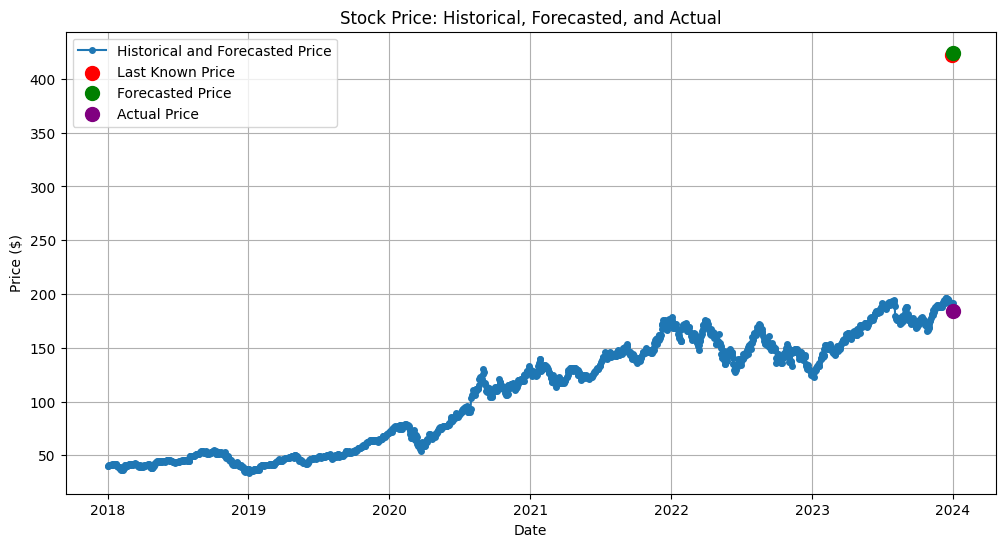

In [ ]:
# Visualize the results
import matplotlib.pyplot as plt
import pandas as pd # Import pandas here as well for Timedelta

# Ensure forecast_date and last_date are defined for plotting even if actual_data is empty
if 'forecast_date' not in locals():
    last_date = visualization_data.index[-1]
    forecast_date = last_date + pd.Timedelta(days=1) # Assume next day for simplicity, adjust if needed


plt.figure(figsize=(12, 6))

# Plot historical prices
plt.plot(visualization_data['Adj Close'].dropna(), label='Historical and Forecasted Price', marker='o', markersize=4)

# Plot the last known price
plt.scatter(last_date, last_price, color='red', s=100, zorder=5, label='Last Known Price')

# Plot the forecasted price
plt.scatter(forecast_date, forecasted_price, color='green', s=100, zorder=5, label='Forecasted Price')

# Plot the actual price if available
if 'actual_data' in locals() and not actual_data.empty and forecast_date in actual_data.index:
    actual_price = actual_data.loc[forecast_date, 'Adj Close']
    plt.scatter(forecast_date, actual_price, color='purple', s=100, zorder=5, label='Actual Price')


# Add titles and labels
plt.title('Stock Price: Historical, Forecasted, and Actual')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()